### Thermal Shift Western LL4 Models

In [63]:
library(ggpubr)
library(drc)
library(ggbeeswarm)
library(broom)
library(tidyverse)

ll4 <- function(slope, emin, emax, ec50, x) {
  value <- emin + ((emax - emin) / (1 + (slope * ((ec50) - (x)))))
  return(value)
}

raw_data <- read_tsv("../validation/20240404_bulk_TSA_data.tsv")

Rows: 192 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Variant
dbl (4): Temperature, Run, Area TYK2, Area GAPDH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


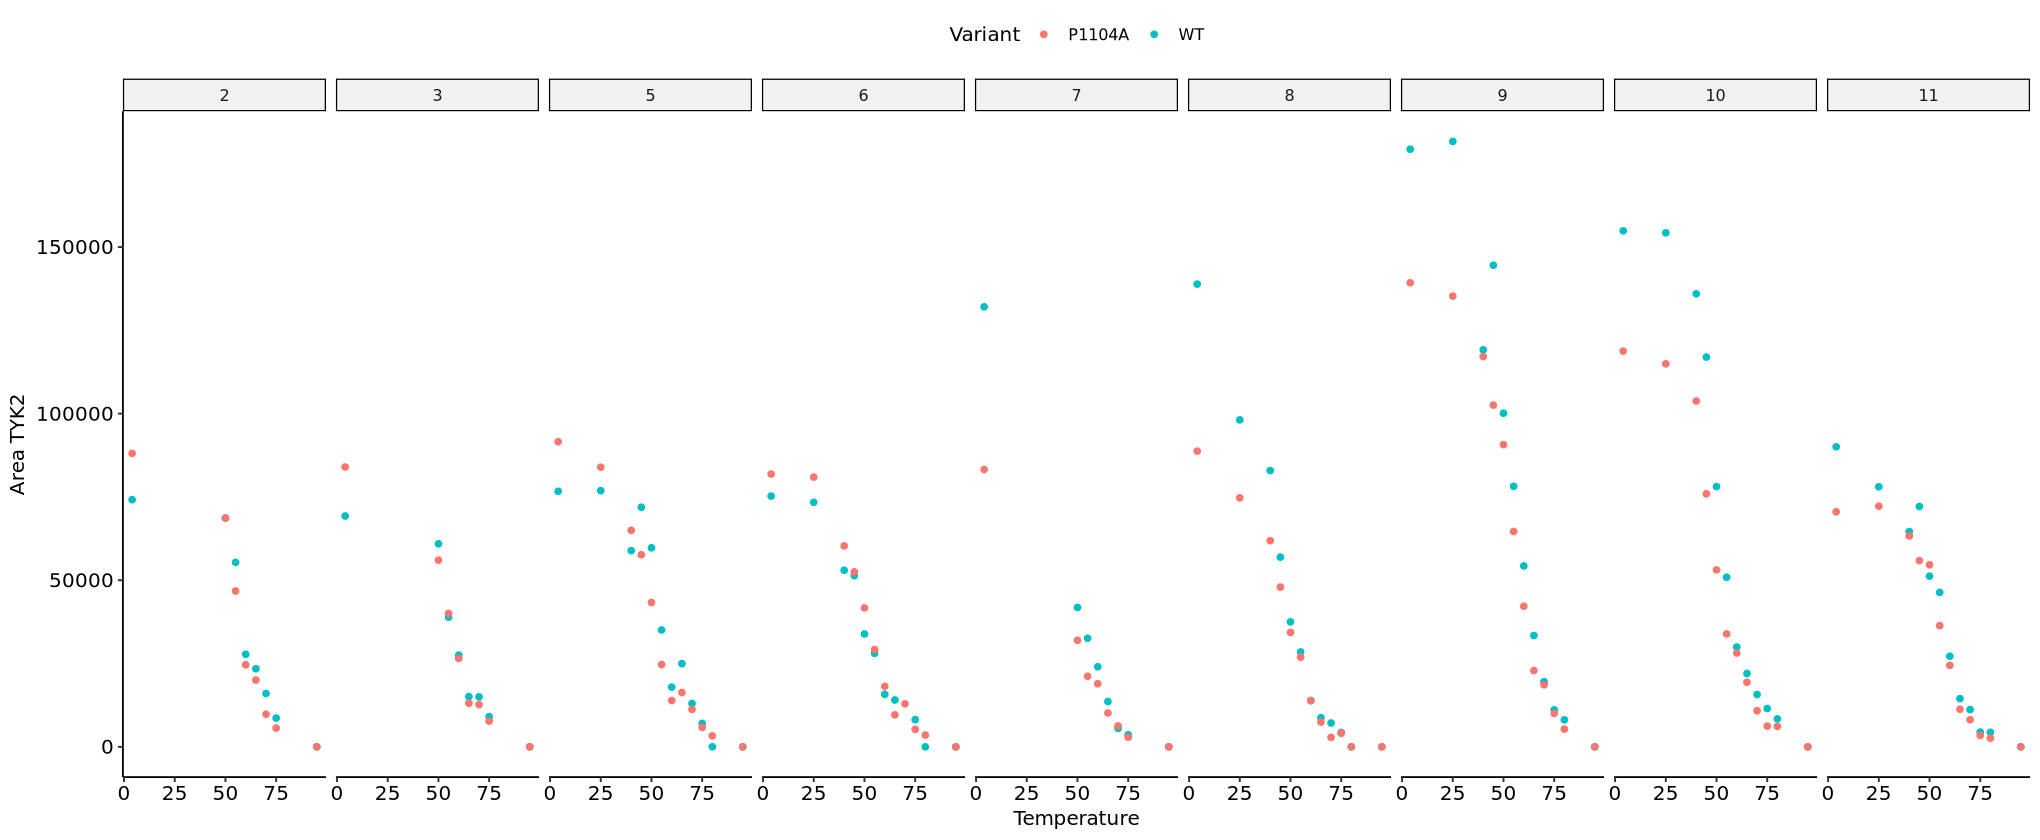

In [4]:
options(repr.plot.width = 17, repr.plot.height = 7)
raw_data %>%
    ggplot() +
        geom_point(aes(x = Temperature, y = `Area TYK2`, color = Variant)) +
        facet_wrap(~Run, nrow = 1) +
        theme_pubr()

In [69]:
drc_mod <- drm(tibble(raw_data$`Area TYK2`,
           raw_data$Temperature),
    curveid = str_c(raw_data$Run, "_", raw_data$Variant),
    fct = LL.4())      

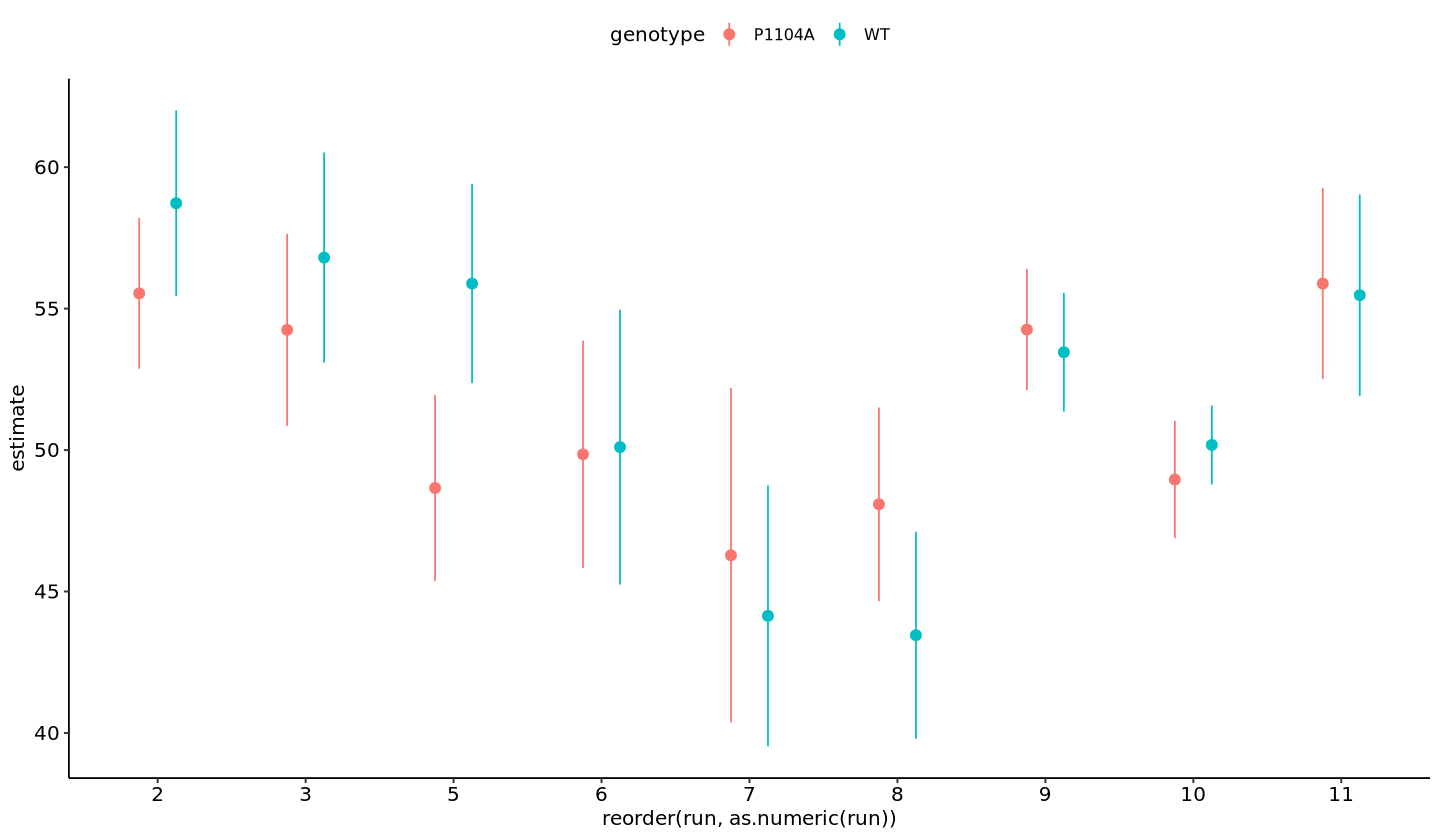

In [79]:
options(repr.plot.width = 12, repr.plot.height = 7)
drc_mod %>%
    tidy() %>%
    filter(term == "e") %>%
    separate(curve, c("run", "genotype"), "_") %>%
    ggplot() +
        geom_pointrange(aes(x = reorder(run, as.numeric(run)),
                       y = estimate,
                        ymin = estimate - 2*std.error,
                        ymax = estimate + 2*std.error,
                            fill = genotype,
                            color = genotype), position = position_dodge(width = 0.5)) +
        theme_pubr() 

In [71]:
ll4_params <- drc_mod %>%
    tidy() %>%
    select(term, curve, estimate) %>%
    pivot_wider(names_from = term, values_from = estimate) %>%
    separate(curve, c("Run", "Variant"), "_") %>%
    mutate(Run = as.numeric(Run)) %>%
    pivot_wider(names_from = Variant, values_from = b:e)

ll4_params

Run,b_WT,b_P1104A,c_WT,c_P1104A,d_WT,d_P1104A,e_WT,e_P1104A
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,11.342336,10.309207,3283.844,1553.6907,76146.78,88733.83,58.72564,55.54052
3,10.292232,8.097521,3403.145,610.6563,70727.45,84098.76,56.80439,54.24931
5,8.226088,5.991073,-157.911,-597.6569,75051.74,88557.56,55.88604,48.65835
6,5.138342,5.538117,-3486.546,-2298.6851,75148.47,81984.84,50.10475,49.85081
7,4.640472,4.913116,-5741.018,-3107.2471,132004.36,83226.75,44.14049,46.28047
8,3.326676,5.817363,-17253.037,-3525.4452,132780.33,83102.63,43.45577,48.08398
9,5.289548,6.781977,-13426.126,-4143.6802,178885.19,136461.63,53.46019,54.25926
10,8.648999,7.448142,4948.735,2792.4747,155096.88,118518.87,50.18024,48.95882
11,6.779823,8.479986,-3699.798,-1466.5935,82472.43,69867.10,55.47543,55.88675


In [72]:
data_with_params <- raw_data %>%
    nest(data = c(Variant, Temperature, `Area TYK2`, `Area GAPDH`)) %>%
    inner_join(ll4_params)

Joining with `by = join_by(Run)`


In [59]:
data_with_params 

Run,data,b_WT,b_P1104A,c_WT,c_P1104A,d_WT,d_P1104A,e_WT,e_P1104A
<dbl>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,"WT , WT , WT , WT , WT , WT , WT , WT , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , 4 , 50 , 55 , 60 , 65 , 70 , 75 , 95 , 4 , 50 , 55 , 60 , 65 , 70 , 75 , 95 , 69267.396, 60922.209, 38897.736, 27530.571, 15061.286, 15002.252, 9069.394 , 0 , 83982.625, 56026.47 , 40045.073, 26504.43 , 13083.842, 12671.925, 7731.486 , 0 , 7939.64 , 7607.531 , 6680.202 , 5300.232 , 2404.117 , 2702.746 , 1866.321 , 0 , 9072.729 , 8120.348 , 7016.526 , 5754.946 , 3691.626 , 3188.272 , 1684.845 , 0",9.456935,8.373178,617.5578,231.2180,62834.98,75006.81,56.68281,53.37379
5,"WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , 4 , 25 , 40 , 45 , 50 , 55 , 60 , 65 , 70 , 75 , 80 , 95 , 4 , 25 , 40 , 45 , 50 , 55 , 60 , 65 , 70 , 75 , 80 , 95 , 76688.34 , 76885.259, 58873.458, 71897.601, 59742.49 , 35068.176, 17912.932, 24947.502, 13028.969, 7024.09 , 0 , 0 , 91563.168, 83924.903, 64965.829, 57645.312, 43305.704, 24685.696, 13893.665, 16292.216, 11241.783, 5808.492 , 3295.815 , 0 , 6846.613 , 6919.259 , 6812.826 , 7073.191 , 6755.693 , 5487.222 , 3015.191 , 4031.695 , 2503.369 , 1186.551 , 306.331 , 419.283 , 8418.267 , 7968.024 , 8047.134 , 7923.889 , 7185.01 , 5478.218 , 3743.074 , 3390.988 , 3215.605 , 1516.467 , 943.395 , 228.57",8.394352,6.171753,-150.3817,-570.0069,67972.46,80267.93,55.17988,47.46973
6,"WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , 4 , 25 , 40 , 45 , 50 , 55 , 60 , 65 , 70 , 75 , 80 , 95 , 4 , 25 , 40 , 45 , 50 , 55 , 60 , 65 , 70 , 75 , 80 , 95 , 75253.032, 73374.194, 52995.903, 51362.121, 33879.253, 28052.956, 15753.054, 14058.719, NA , 8150.047 , 0 , 0 , 81869.018, 80949.861, 60302.906, 52514.95 , 41693.66 , 29196.519, 18144.397, 9590.341 , 12906.167, 5245.514 , 3533.904 , 0 , 7807.648 , 7276.373 , 7899.38 , 7014.916 , 6110.023 , 5575.531 , 3204.346 , 2069.323 , 1222.058 , 1028.212 , 509.688 , 274.64 , 9325.399 , 8978.308 , 9126.928 , 8819.429 , 7888.798 , 7155.508 , 4869.303 , 2361.154 , 3417.104 , 1249.623 , 733.185 , 179.207",5.027893,5.639659,-2930.0659,-1533.2084,67719.50,72881.15,48.62898,48.08730
7,"WT , WT , WT , WT , WT , WT , WT , WT , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , 4 , 50 , 55 , 60 , 65 , 70 , 75 , 95 , 4 , 50 , 55 , 60 , 65 , 70 , 75 , 95 , 132055.589, 41833.837 , 32575.682 , 24029.066 , 13592.228 , 5530.952 , 3639.951 , 0 , 83247.534 , 31951.308 , 21170.795 , 18948.464 , 10158.082 , 6277.415 , 2892.068 , 0 , 9183.185 , 8111.313 , 8372.369 , 6967.084 , 4078.031 , 1897.368 , 915.678 , 244.443 , 8560.736 , 8237.822 , 7943.712 , 6613.607 , 3616.239 , 1402.967 , 784.04 , 235.38",4.946611,5.061832,-3743.9006,-1698.2093,122849.58,74686.02,42.26310,43.14904
8,"WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , 4 , 25 , 40 , 45 , 50 , 55 , 60 , 65 , 70 , 75 , 80 , 95 , 4 , 25 , 40 , 45 , 50 , 55 , 60 , 65 , 70 , 75 , 80 , 95 , 138878.6, 98129.8 , 82911.4 , 56935.4 , 37497 , 28477.2 , 13871.2 , 8762.7 , 7140.8 , 4314.4 , 0 , 0 , 88752.2 , 74742.2 , 61867.7 , 47940.7 , 34345.4 , 26909 , 13891.1 , 7433.5 , 2852.6 , 4062.8 , 0 , 0 , 7761.9 , 7384.8 , 7976.6 , 7735.3 , 6734.4 , 6301.4 , 3718.4 , 1943.2 , 1710.5 , 878.8 , 526.4 , 0 , 7340.1 , 7251.1 , 7547.2 , 7412.8 , 7134.1 , 6656.4 , 4226.7 , 2554.8 , 1025.6 , 1327.7 , 318.6 , 147.4",3.192479,6.004095,-16238.9034,-2840.3151,126497.58,75863.38,41.49372,46.45937
9,"WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , WT , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , P1104A , 4 , 2

Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(data)`.”
Warning message:
“Removed 101 rows containing missing values (`geom_function()`).”


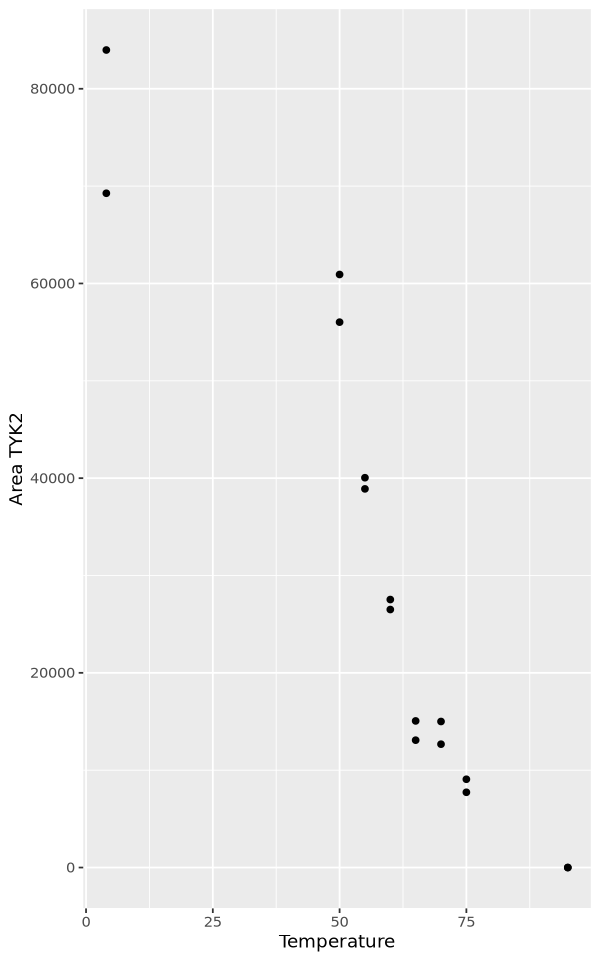

In [65]:
make_plot <- function(data_row){

    df <- data_row %>%
        select(Run, data) %>%
        unnest()
    
    the_plot <- ggplot(df) +
        geom_point(aes(x = Temperature,
                       y = `Area TYK2`)) +
        stat_function(fun = ll4, args = list(data_row$b_WT[1],
                                       data_row$c_WT[2],
                                       data_row$d_WT[3],
                                       data_row$e_WT[4]))

    the_plot

}

make_plot(data_with_params[1,])